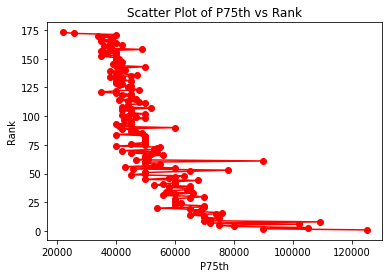

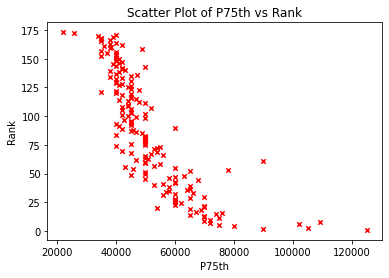

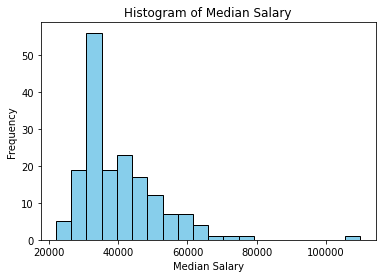

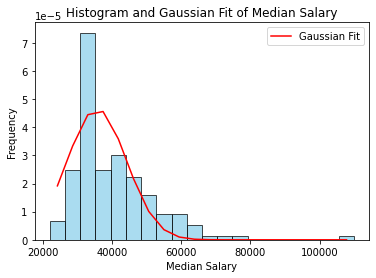

fitted values:  [1.91636827e-05 3.33006279e-05 4.44482355e-05 4.55706555e-05
 3.58876216e-05 2.17086455e-05 1.00867075e-05 3.59993597e-06
 9.86890060e-07 2.07812383e-07 3.36126475e-08 4.17602094e-09
 3.98521048e-10 2.92124855e-11 1.64480496e-12 7.11359197e-14
 2.36315466e-15 6.03009271e-17 1.18191021e-18 1.77940016e-20]


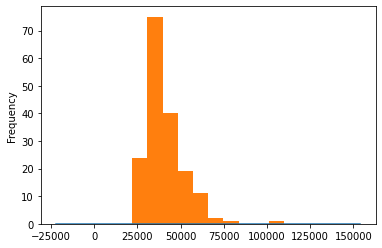

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit
import seaborn as sns 

df = pd.read_csv('recent-grads.csv',delimiter=',')

def plotter(x,y):
    plt.plot(x, y, 'ro-')
    plt.xlabel('P75th')
    plt.ylabel('Rank')
    plt.title('Scatter Plot of P75th vs Rank')
    plt.show()

    
plotter(df['P75th'],df['Rank'] )

# Plot the data using DataFrame.plot
df.plot(x='P75th', y='Rank', kind='scatter', color='red', marker='x', title='Scatter Plot of P75th vs Rank')
plt.show()

# Plot the histogram of the 'Median' column
df['Median'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
# Customize labels and title
plt.xlabel('Median Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Median Salary')
plt.show()

#----------------------------------------------------
# Plot the histogram of the 'Median' column
hist, bin_edges, _ = plt.hist(df['Median'], bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7)
# Define the fit function (Gaussian distribution in this example)
def gaussian_fit(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

# Fit the histogram data with the Gaussian function
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
params, covariance = curve_fit(gaussian_fit, bin_centers, hist, p0=[df['Median'].mean(), df['Median'].std()])

# Plot the fitted curve
fit_curve = gaussian_fit(bin_centers, *params)
plt.plot(bin_centers, fit_curve, 'r-', label='Gaussian Fit')

# Customize labels and title
plt.xlabel('Median Salary')
plt.ylabel('Frequency')
plt.title('Histogram and Gaussian Fit of Median Salary')

# Show the plot
plt.legend()
plt.show()
print('fitted values: ' ,fit_curve)
#----------------------------------------------------

df['Median'].plot.kde()
df['Median'].plot.hist()
plt.show()

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0   2057.0    282.0    Engineering    0.120564           36      1976  ...   
1    679.0     77.0    Engineering    0.101852            7       640  ...   
2    725.0    131.0    Engineering    0.153037            3       648  ...   
3   1123.0    135.0    Engineering    0.107313           16       758  ...   
4  21239.0  11021.0    Engineering    0.341631          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0  

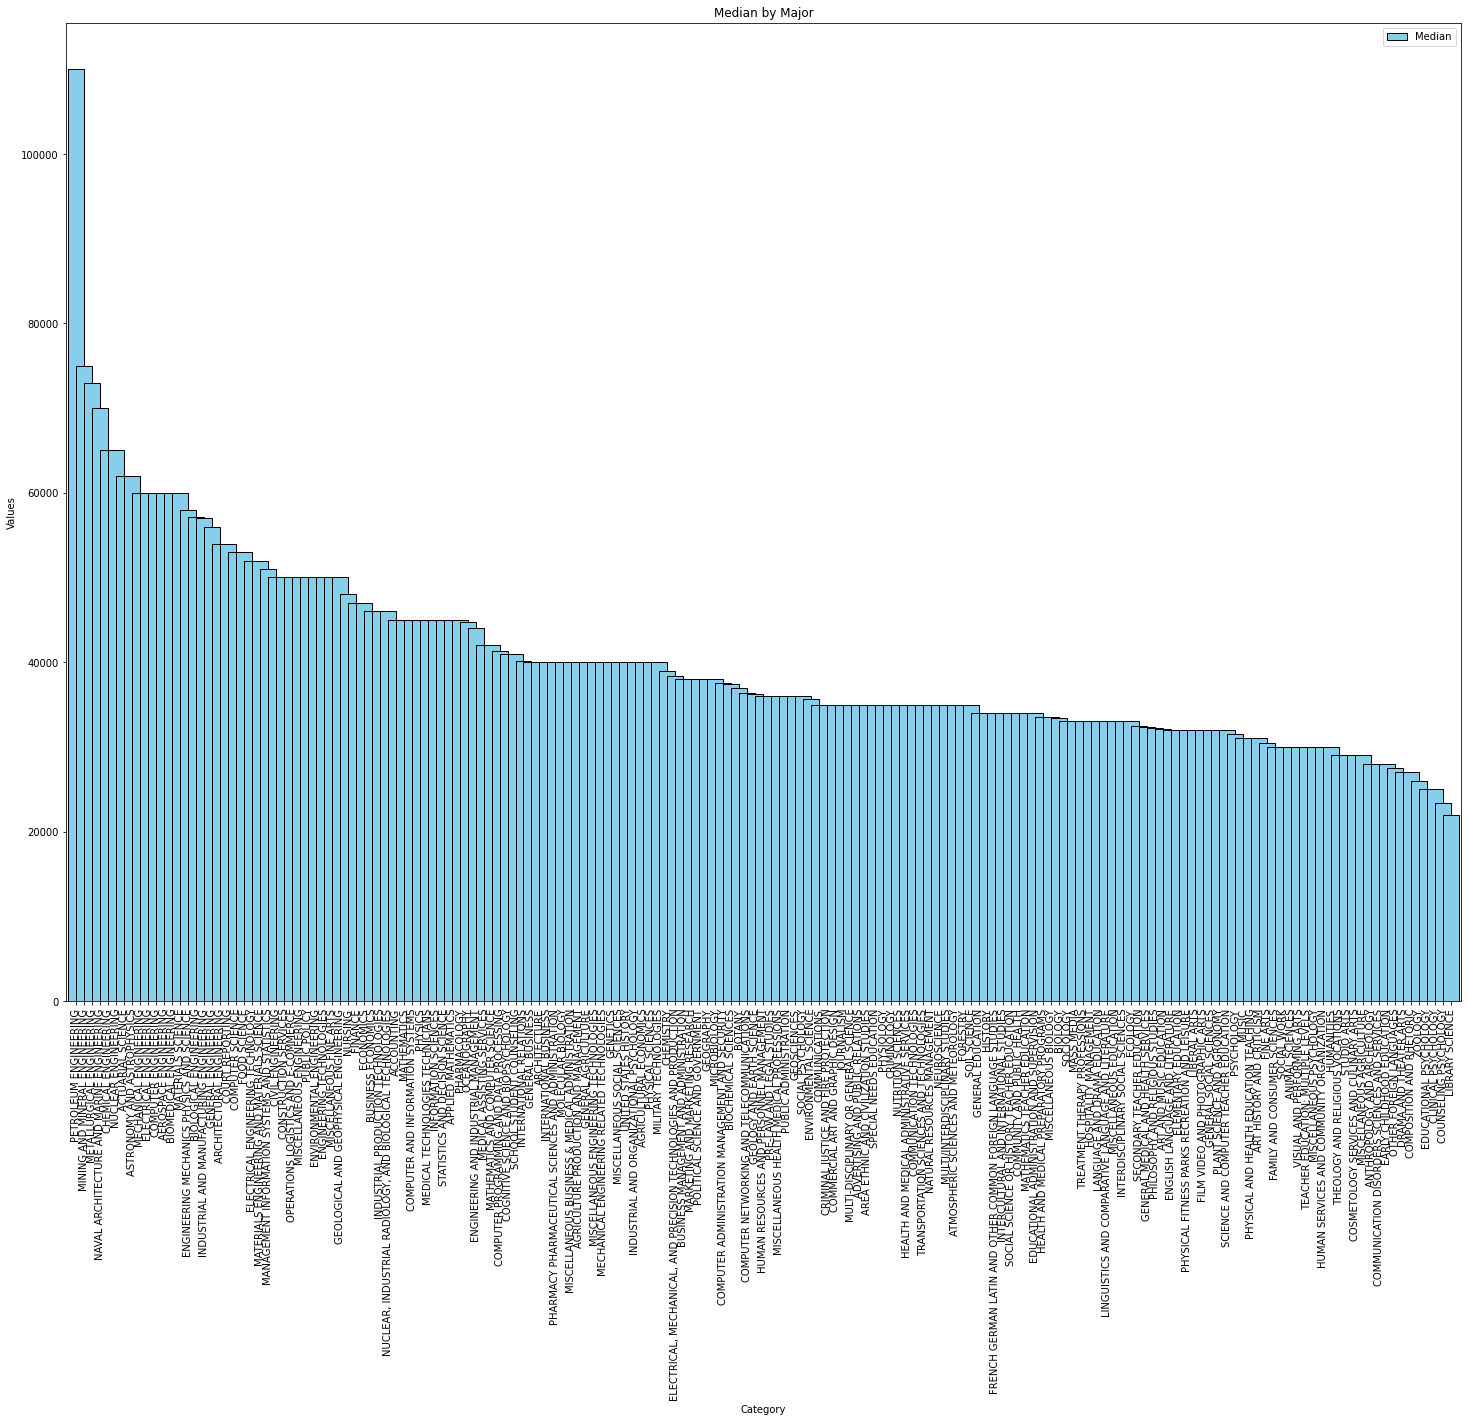

In [32]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('recent-grads.csv',delimiter=',')

# Create a new dataframe using the top 5 of df after sorting by “Median” values (use df.sort_values(...) and .head) 
first_five_medians = df.sort_values(by='Median',ascending=False).head(5)
print(first_five_medians)

# Plot a bar chart
df.plot(x='Major', y='Median', kind='bar', color='skyblue', edgecolor='black',width=2,figsize=(25, 18))
# Customize labels and title
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Median by Major')
plt.show()

In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('recent-grads.csv',delimiter=',')

# Create a new dataframe 
sorted_medians = df.sort_values(by='Median')
top_medians = sorted_medians.loc[sorted_medians['Median'] > 60000, 'Rank':'Low_wage_jobs' ]

print(top_medians)

   Rank  Major_code                                      Major    Total  \
7     8        5001                 ASTRONOMY AND ASTROPHYSICS   1792.0   
6     7        6202                          ACTUARIAL SCIENCE   3777.0   
5     6        2418                        NUCLEAR ENGINEERING   2573.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
0     1        2419                      PETROLEUM ENGINEERING   2339.0   

       Men    Women     Major_category  ShareWomen  Sample_size  Employed  \
7    832.0    960.0  Physical Sciences    0.535714           10      1526   
6   2110.0   1667.0           Business    0.441356           51      2912   
5   2200.0    373.0        Engineering    0.144967           17      1857   
4  21239.0  1102

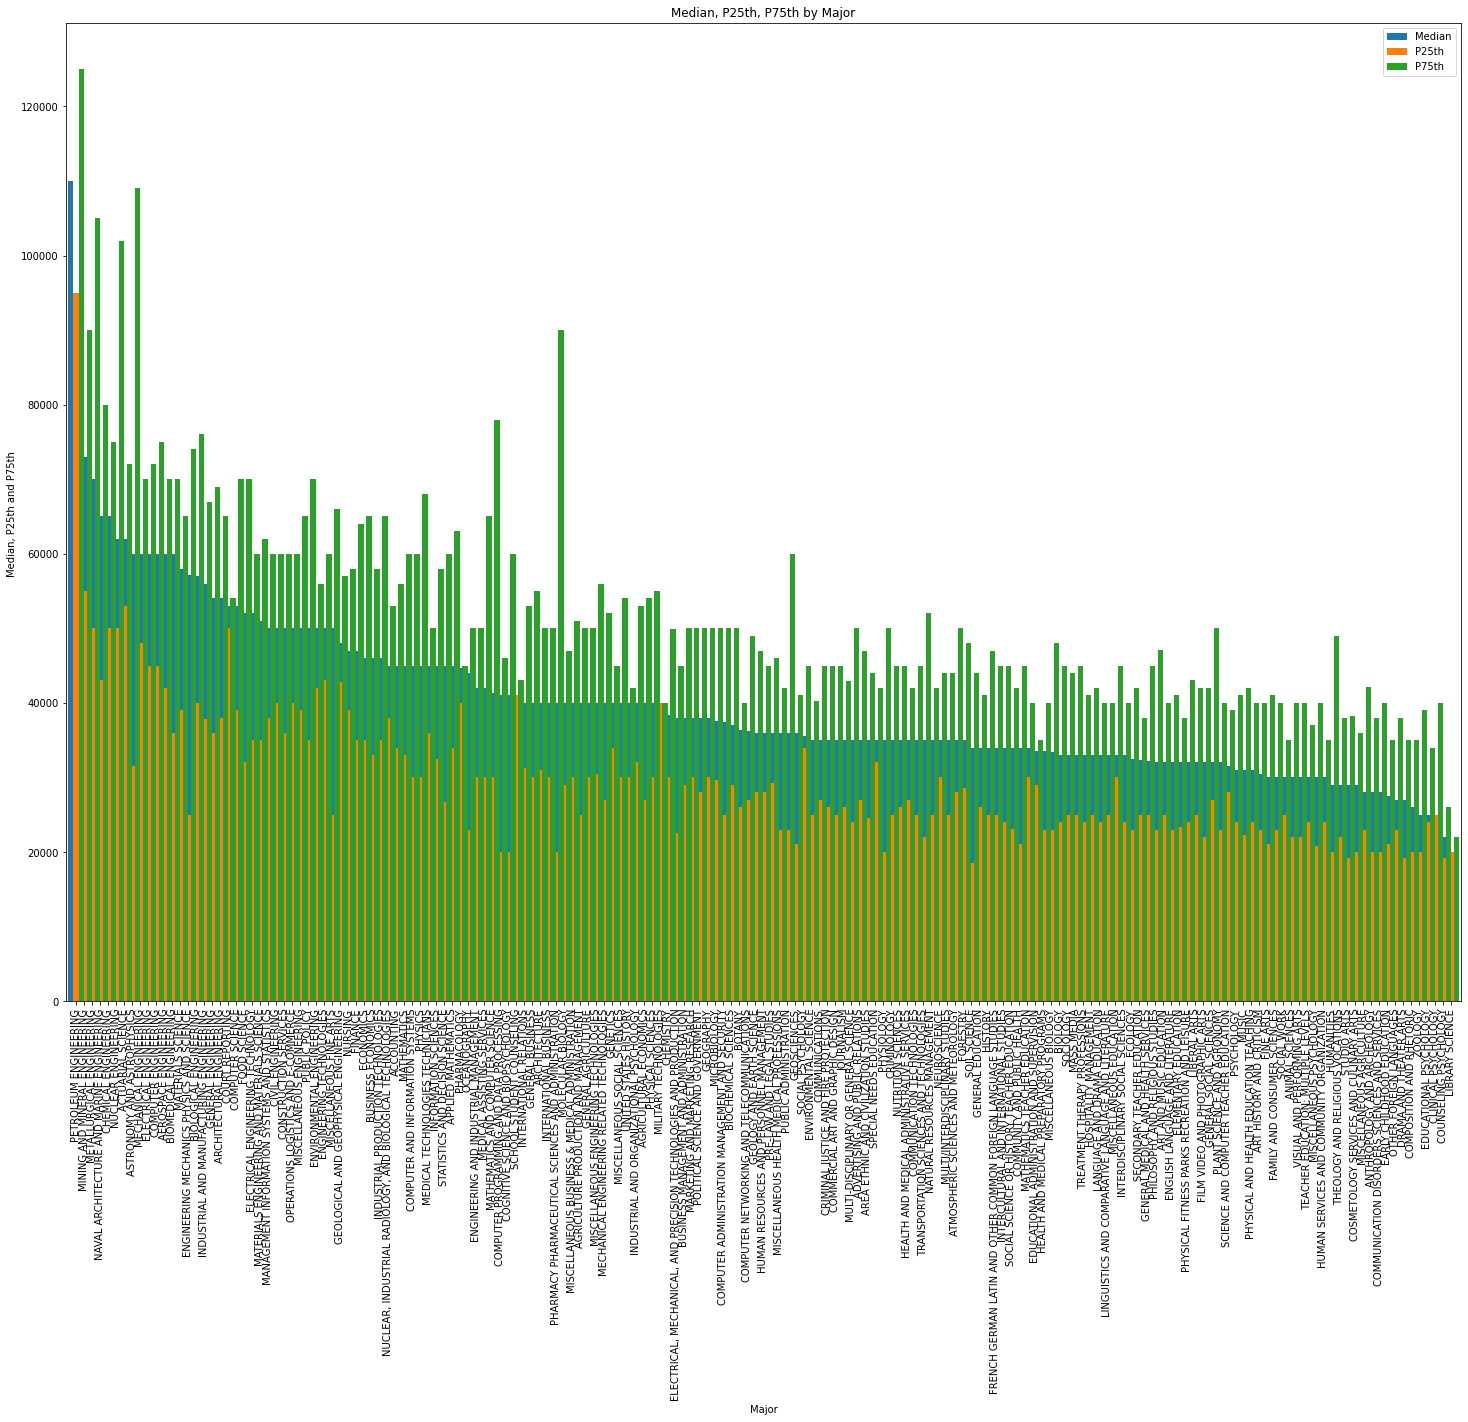

In [16]:
#Create a bar plot using “Major” as x and “Median”, P25th and P75th as y.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('recent-grads.csv',delimiter=',')

df1 =  df.loc[:,['Major','Median','P25th','P75th']]
df1.plot(x='Major',y=['Median','P25th','P75th'],kind='bar',width=2,figsize=(25, 18))
# Customize labels and title
plt.xlabel('Major')
plt.ylabel('Median, P25th and P75th ')
plt.title('Median, P25th, P75th by Major')
plt.show()

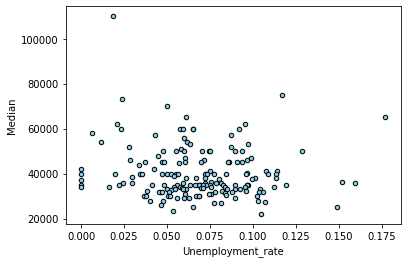

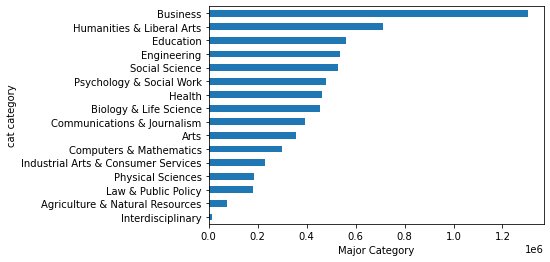

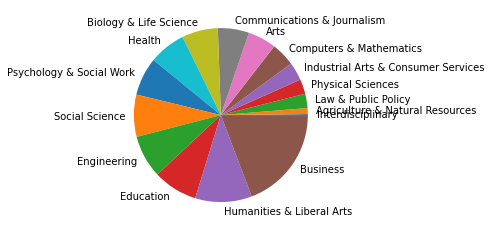

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit


df = pd.read_csv('recent-grads.csv',delimiter=',')
# Plot a scatter plot
df.plot(x="Unemployment_rate", y='Median', kind='scatter', color='skyblue', edgecolor='black')
plt.show()
cat_totals = df.groupby('Major_category')['Total'].sum().sort_values()

# Plot cat_totals
cat_totals.plot(x='Major_category',y='cat_totals',kind='barh')
plt.xlabel('Major Category')
plt.ylabel('cat category')
plt.show()

# Plot a Pie chart
cat_totals.plot(x='Major_category',y='cat_totals',kind='pie')
plt.ylabel(' ')
plt.show()